Let's make sure all needed libraries are present:

pip install pandas numpy matplotlib plotly
# pandas-profiling

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from datetime import datetime
# from ydata_profiling import ProfileReport
import wget
import os.path
import seaborn as sns

Let's load our files:

In [2]:
if not os.path.isfile('data/listings.csv.gz'):
    wget.download('http://data.insideairbnb.com/australia/vic/melbourne/2023-09-04/data/listings.csv.gz', out = 'data/listings.csv.gz')

if not os.path.isfile('data/calendar.csv.gz'):
    wget.download('http://data.insideairbnb.com/australia/vic/melbourne/2023-09-04/data/calendar.csv.gz', out = 'data/calendar.csv.gz')

if not os.path.isfile('data/reviews.csv.gz'):
    wget.download('http://data.insideairbnb.com/australia/vic/melbourne/2023-09-04/data/reviews.csv.gz', out = 'data/reviews.csv.gz')

In [3]:
df_calendar = pd.read_csv('data/calendar.csv.gz')
df_listings = pd.read_csv('data/listings.csv.gz')
df_reviews = pd.read_csv('data/reviews.csv.gz')

Initial explore:

In [4]:
df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10803,2023-09-05,f,$49.00,$49.00,5.0,14.0
1,10803,2023-09-06,f,$49.00,$49.00,5.0,14.0
2,10803,2023-09-07,f,$49.00,$49.00,5.0,14.0
3,10803,2023-09-08,f,$49.00,$49.00,5.0,14.0
4,10803,2023-09-09,f,$49.00,$49.00,5.0,14.0


In [5]:
df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...
1,10803,3369053,2013-01-18,1763045,Julie,Perfect isnt enough! Lindsay was the best host...
2,10803,3403930,2013-01-23,4423532,Ivonne,Living with Lindsay was very relaxed. The room...
3,10803,3514479,2013-02-11,4551787,Jess,"Beautiful home, great location very friendly a..."
4,10803,3662039,2013-03-01,632036,Yvonne And Pip,It was great staying at Lindsay's apartment. H...


In [6]:
df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,https://www.airbnb.com/rooms/10803,20230904181306,2023-09-05,city scrape,Rental unit in Brunswick East · ★4.49 · 1 bedr...,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,...,4.69,4.66,4.61,NaN,f,1,0,1,0,1.33
1,12936,https://www.airbnb.com/rooms/12936,20230904181306,2023-09-05,previous scrape,Rental unit in St Kilda · ★4.68 · 1 bedroom · ...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,...,4.83,4.78,4.66,NaN,f,10,10,0,0,0.26
2,38271,https://www.airbnb.com/rooms/38271,20230904181306,2023-09-04,city scrape,Rental unit in Berwick · ★4.86 · 3 bedrooms · ...,No children under 13 will be accepted in your ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,...,4.94,4.90,4.88,NaN,f,1,1,0,0,1.47
3,41836,https://www.airbnb.com/rooms/41836,20230904181306,2023-09-05,previous scrape,Home in Reservoir · ★4.71 · 1 bedroom · 1 bed ...,Easy to travel from and to the Airport; quiet ...,"The neighbours are quiet and friendly, please...",https://a0.muscache.com/pictures/569696dd-1ad0...,182833,...,4.83,4.39,4.69,NaN,f,2,0,2,0,1.02
4,43429,https://www.airbnb.com/rooms/43429,20230904181306,2023-09-04,city scrape,Rental unit in Oakleigh East · ★4.87 · 1 bedro...,NaN,Oakleigh is one of the most convenient and div...,https://a0.muscache.com/pictures/8c6284de-36de...,189684,...,4.93,4.79,4.86,NaN,f,3,3,0,0,1.60


Testing Pandas profiling package:

```python
# Disabled
profile_listings = ProfileReport(df_listings, title="Pandas Profiling Report - Listing dataset")
profile_listings.to_notebook_iframe()
```

We encounter some memory restrictions. Let's try to optimize a bit:

In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23185 non-null  int64  
 1   listing_url                                   23185 non-null  object 
 2   scrape_id                                     23185 non-null  int64  
 3   last_scraped                                  23185 non-null  object 
 4   source                                        23185 non-null  object 
 5   name                                          23185 non-null  object 
 6   description                                   22822 non-null  object 
 7   neighborhood_overview                         13256 non-null  object 
 8   picture_url                                   23185 non-null  object 
 9   host_id                                       23185 non-null 

In [8]:
# Show all columns (instead of cascading columns in the middle)
pd.set_option("display.max_columns", None)

In [9]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,https://www.airbnb.com/rooms/10803,20230904181306,2023-09-05,city scrape,Rental unit in Brunswick East · ★4.49 · 1 bedr...,A large air conditioned room with firm queen s...,This hip area is a crossroads between two grea...,https://a0.muscache.com/pictures/e5f30dd1-ac57...,38901,https://www.airbnb.com/users/show/38901,Lindsay,2009-09-16,"Melbourne, Australia",As an artist working in animation and video I ...,within a few hours,100%,95%,f,https://a0.muscache.com/im/pictures/user/6860c...,https://a0.muscache.com/im/pictures/user/6860c...,Brunswick,1.0,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,NaN,-37.76606,144.97951,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,1.0,"[""Microwave"", ""Hot water kettle"", ""Drying rack...",$49.00,5,14,1,5,14,14,5.0,14.0,NaN,t,4,13,35,201,2023-09-05,173,21,0,2013-01-12,2023-07-19,4.49,4.65,3.98,4.72,4.69,4.66,4.61,NaN,f,1,0,1,0,1.33
1,12936,https://www.airbnb.com/rooms/12936,20230904181306,2023-09-05,previous scrape,Rental unit in St Kilda · ★4.68 · 1 bedroom · ...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,https://a0.muscache.com/pictures/59701/2e8cdaf...,50121,https://www.airbnb.com/users/show/50121,The A2C Team,2009-10-31,"Melbourne, Australia",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3894a...,https://a0.muscache.com/im/pictures/user/3894a...,St Kilda,10.0,20.0,"['email', 'phone', 'work_email']",t,t,"St Kilda, Victoria, Australia",Port Phillip,NaN,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Microwave"", ""Lockbox"", ""Hot water"", ""Smoke a...",$95.00,3,14,3,3,14,14,3.0,14.0,NaN,t,0,0,0,0,2023-09-05,42,0,0,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,NaN,f,10,10,0,0,0.26
2,38271,https://www.airbnb.com/rooms/38271,20230904181306,2023-09-04,city scrape,Rental unit in Berwick · ★4.86 · 3 bedrooms · ...,No children under 13 will be accepted in your ...,Our street is quiet & secluded but within walk...,https://a0.muscache.com/pictures/1182791/3bf4b...,164193,https://www.airbnb.com/users/show/164193,Daryl & Dee,2010-07-12,"Berwick, Australia",We are an active couple who work from home and...,within an hour,100%,91%,t,https://a0.muscache.com/im/pictures/user/29c38...,https://a0.muscache.com/im/pictures/user/29c38...,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",Casey,NaN,-38.05723,145.33982,Entire rental unit,Entire home/apt,5,NaN,1 bath,3.0,3.0,"[""Microwave"", ""Hot water kettle"", ""Drying rack...",$116.00,1,14,1,1,14,14,1.0,14.0,NaN,t,18,40,64,325,2023-09-04,228,36,3,2010-11-24,2023-0

Candidates for removal based on first sneak peak:

Empty attributes (based on pd.info())
- neighbourhood_group_cleansed
- bathrooms
- calendar_updated
- license

Non-descriptive data
- listing_url
- scrape_id
- last_scraped
- source
- host_url
- host_since (might be good for confidence level use)
- host_about
- host_location (might be used to select preference on local-living hosts?)
- calendar_last_scraped

No text analysis for the time being
- description
- neighborhood_overview
- name
- host_name

Redundand / attributes not used
- picture_url?

High cardinality (difficult to extract relationships)
- name

### Start of initial playground to quickly inspect specific attributes:

In [10]:
df_listings['source'].unique()

array(['city scrape', 'previous scrape'], dtype=object)

In [11]:
df_listings['host_location'].unique()

array(['Melbourne, Australia', 'Berwick, Australia',
       'Oakleigh East, Australia', 'Ripponlea, Australia',
       'Tawonga South, Australia', 'Frankston, Australia',
       'Middle Park, Australia', 'Northcote, Australia',
       'Victoria, Australia', 'Port Melbourne, Australia', nan,
       'South Yarra, Australia', 'Brunswick, Australia',
       'Yarraville, Australia', 'Mordialloc, Australia',
       'Prahran, Australia', 'Seddon, Australia', 'Dandenong, Australia',
       'Australia', 'Balaclava, Australia', 'Torquay, Australia',
       'Macclesfield, Australia', 'Parkdale, Australia',
       'Altona, Australia', 'Collingwood, Australia', 'Elwood, Australia',
       'Preston, Australia', 'Belgrave, Australia',
       'Parkville, Australia', 'Upwey, Australia',
       'South Morang, Australia', 'Sydney, Australia', 'Perth, Australia',
       'Ocean Grove, Australia', 'St Kilda, Australia',
       'Fitzroy North, Australia', 'United States', 'Somers, Australia',
       'New Yor

In [12]:
df_listings['host_location'].nunique()

957

In [13]:
df_listings['calendar_last_scraped'].unique()

array(['2023-09-05', '2023-09-04'], dtype=object)

In [14]:
df_listings['name'].nunique()

16587

In [15]:
df_listings['host_name'].nunique()

5353

In [16]:
df_listings['host_name'].tail(10)

23175     Tanya
23176       Sam
23177    Brodie
23178    Daniel
23179      Gary
23180       Dlb
23181       Fan
23182      Trần
23183    Steven
23184    Ratana
Name: host_name, dtype: object

End of playground

### Initial clean-up

Since none of the attributes above offers any valuable insights (e.g. host location or name won't play a part in the place's rent price), let's remove the columns listed above:

In [17]:
df_listings = df_listings.drop(['neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated', 'license', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_url', 
                                'host_since', 'host_about', 'host_location', 'calendar_last_scraped', 'description', 'neighborhood_overview', 'picture_url', 'host_thumbnail_url', 'host_picture_url',
                                'name', 'host_name'], 
                                axis=1)

In [18]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 55 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23185 non-null  int64  
 1   host_id                                       23185 non-null  int64  
 2   host_response_time                            15418 non-null  object 
 3   host_response_rate                            15418 non-null  object 
 4   host_acceptance_rate                          16579 non-null  object 
 5   host_is_superhost                             22468 non-null  object 
 6   host_neighbourhood                            8772 non-null   object 
 7   host_listings_count                           23183 non-null  float64
 8   host_total_listings_count                     23183 non-null  float64
 9   host_verifications                            23183 non-null 

Let's try Pandas profiling once again: # DISABLED

```python
profile_listings = ProfileReport(df_listings, title="Pandas Profiling Report - Listings dataset")
# profile_listings.to_notebook_iframe()
profile_listings.to_file("data\listings_profiling.html")

Now let's do some intial changes to the data types:

In [19]:
df_listings.head(5)

,id,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10803,38901,within a few hours,100%,95%,f,Brunswick,1.0,1.0,"['email', 'phone']",t,t,"Brunswick East, Victoria, Australia",Moreland,-37.76606,144.97951,Private room in rental unit,Private room,2,1 shared bath,NaN,1.0,"[""Microwave"", ""Hot water kettle"", ""Drying rack...",$49.00,5,14,1,5,14,14,5.0,14.0,t,4,13,35,201,173,21,0,2013-01-12,2023-07-19,4.49,4.65,3.98,4.72,4.69,4.66,4.61,f,1,0,1,0,1.33
1,12936,50121,NaN,NaN,NaN,f,St Kilda,10.0,20.0,"['email', 'phone', 'work_email']",t,t,"St Kilda, Victoria, Australia",Port Phillip,-37.85999,144.97662,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Microwave"", ""Lockbox"", ""Hot water"", ""Smoke a...",$95.00,3,14,3,3,14,14,3.0,14.0,t,0,0,0,0,42,0,0,2010-08-04,2020-03-15,4.68,4.78,4.71,4.83,4.83,4.78,4.66,f,10,10,0,0,0.26
2,38271,164193,within an hour,100%,91%,t,NaN,1.0,1.0,"['email', 'phone', 'work_email']",t,t,"Berwick, Victoria, Australia",Casey,-38.05723,145.33982,Entire rental unit,Entire home/apt,5,1 bath,3.0,3.0,"[""Microwave"", ""Hot water kettle"", ""Drying rack...",$116.00,1,14,1,1,14,14,1.0,14.0,t,18,40,64,325,228,36,3,2010-11-24,2023-08-26,4.86,4.92,4.98,4.91,4.94,4.90,4.88,f,1,1,0,0,1.47
3,41836,182833,NaN,NaN,NaN,f,NaN,3.0,3.0,"['email', 'phone', 'work_email']",t,t,"Reservoir, Victoria, Australia",Darebin,-37.69761,145.00066,Private room in home,Private room,2,1 shared bath,NaN,1.0,"[""Smoking allowed"", ""Smoke alarm"", ""Wifi"", ""Ki...",$40.00,7,365,7,7,1125,1125,7.0,1125.0,t,0,0,0,0,159,0,0,2010-11-16,2018-08-22,4.71,4.68,4.65,4.89,4.83,4.39,4.69,f,2,0,2,0,1.02
4,43429,189684,within an hour,100%,99%,t,NaN,5.0,37.0,"['email', 'phone']",t,t,"Oakleigh East, Victoria, Australia",Monash,-37.89983,145.11579,Entire rental unit,Entire home/apt,2,1 bath,1.0,1.0,"[""Stainless steel gas stove"", ""Microwave"", ""Ho...",$117.00,2,1125,2,4,1125,1125,2.1,1125.0,t,26,46,59,321,248,19,1,2010-12-05,2023-09-02,4.87,4.91,4.93,4.94,4.93,4.79,4.86,f,3,3,0,0,1.60


### Playground

In [20]:
df_listings['host_response_time'].unique()

array(['within a few hours', nan, 'within an hour', 'within a day',
       'a few days or more'], dtype=object)

In [21]:
df_listings['host_response_rate'].unique()

array(['100%', nan, '0%', '97%', '90%', '88%', '70%', '50%', '92%', '86%',
       '96%', '13%', '75%', '67%', '83%', '57%', '95%', '43%', '84%',
       '80%', '33%', '78%', '10%', '94%', '89%', '60%', '99%', '20%',
       '91%', '93%', '63%', '82%', '98%', '53%', '65%', '45%', '87%',
       '40%', '72%', '17%', '73%', '14%', '71%', '25%', '22%', '44%',
       '69%', '42%', '30%', '85%', '6%', '38%', '81%', '56%', '79%',
       '27%', '31%', '15%', '39%', '8%', '62%', '29%', '64%'],
      dtype=object)

In [22]:
df_listings['host_is_superhost'].value_counts()

host_is_superhost
f    16847
t     5621
Name: count, dtype: int64

In [23]:
df_listings['property_type'].value_counts()

property_type
Entire rental unit             9862
Entire home                    3615
Private room in home           2807
Private room in rental unit    1745
Entire condo                    835
                               ... 
Floor                             1
Shared room                       1
Shared room in resort             1
Private room in train             1
Entire home/apt                   1
Name: count, Length: 83, dtype: int64

In [24]:
df_listings['room_type'].value_counts()

room_type
Entire home/apt    16887
Private room        5932
Shared room          277
Hotel room            89
Name: count, dtype: int64

In [25]:
df_listings[['minimum_nights', 'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm']].notna().agg('sum')

minimum_nights            23185
minimum_minimum_nights    23185
minimum_nights_avg_ntm    23185
maximum_nights            23185
maximum_minimum_nights    23185
maximum_nights_avg_ntm    23185
dtype: int64

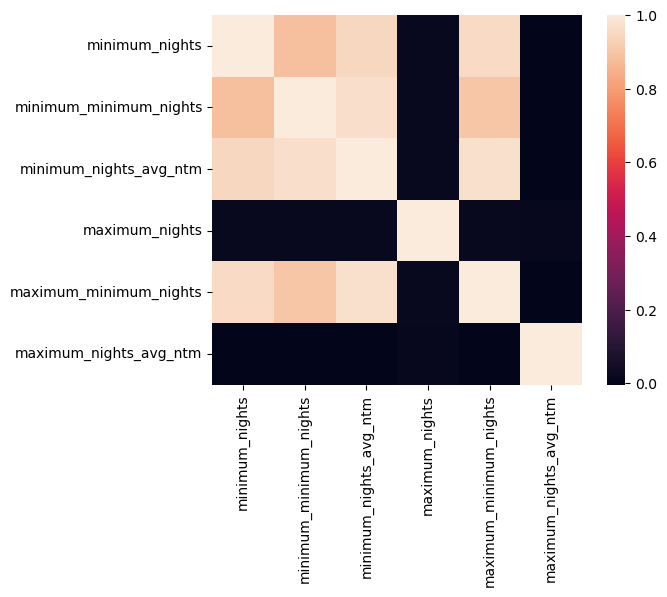

In [26]:
#correlation matrix
corrmat = df_listings[['minimum_nights', 'minimum_minimum_nights', 'minimum_nights_avg_ntm', 'maximum_nights', 'maximum_minimum_nights', 'maximum_nights_avg_ntm']].corr()
f, ax = plt.subplots()
sns.heatmap(corrmat, 
            # vmax=.8, 
            square=True);

`minimum_nights`, `minimum_minimum_nights`, `minimum_nights_avg_ntm` and `maximum_minimum_nights` are highly correlated, so let's stick with minimum_nights for simplicity

In [27]:
df_listings[['maximum_nights', 'maximum_nights_avg_ntm']]

,maximum_nights,maximum_nights_avg_ntm
0,14,14.0
1,14,14.0
2,14,14.0
3,365,1125.0
4,1125,1125.0
...,...,...
23180,365,365.0
23181,365,365.0
23182,365,365.0
23183,365,365.0


It appears there's something going on because of datatypes. Let's try to fix that up:

In [28]:
corrmat = df_listings[['maximum_nights', 'maximum_nights_avg_ntm']].astype('int').corr()

fig = px.imshow(corrmat, 
            text_auto=True
            );
fig.show()

Not what was expecting. Let's try a scatterplot

In [29]:
px.scatter(df_listings[['maximum_nights', 'maximum_nights_avg_ntm']].astype('int'),
           x='maximum_nights',
           y='maximum_nights_avg_ntm')

Might be a direct result of outliers?

In [30]:
df_max_nights = df_listings[['maximum_nights', 'maximum_nights_avg_ntm']]\
                    .astype('int')
df_max_nights = df_max_nights[(df_max_nights['maximum_nights'] < 10000) & (df_max_nights['maximum_nights_avg_ntm'] < 10000)]

px.scatter(df_max_nights,
           x='maximum_nights',
           y='maximum_nights_avg_ntm')

Ratio of records with `maximum_nights_avg_ntm` = 1125:

In [31]:
df_listings[df_listings['maximum_nights_avg_ntm'] == 1125].shape[0] / df_listings.shape[0]

0.516497735604917

`maximum_nights_avg_ntm` seems pretty extreme and more than half has a "capped" value of 1125. Doesn't seem reliable. Will skip it for now...

Now **Reviews attributes:**

number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
reviews_per_month


In [32]:
corrmat = df_listings[['number_of_reviews',\
                        'number_of_reviews_ltm',\
                        'number_of_reviews_l30d',\
                        'reviews_per_month']].corr()

fig = px.imshow(corrmat.round(2), 
            text_auto=True
            );
fig.show()

`number_of_reviews_ltm` and `number_of_reviews_l30d` are highly corr. with `reviews_per_month`. Removing...

In [33]:
df_listings['instant_bookable'].value_counts()

instant_bookable
f    17255
t     5930
Name: count, dtype: int64

Finally, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms

In [34]:
corrmat = df_listings[['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms']].corr()

fig = px.imshow(corrmat.round(2), 
            text_auto=True
            );
fig.show()

`calculated_host_listings_count_entire_homes`, `calculated_host_listings_count_private_rooms` are highly corr. with `calculated_host_listings_count`. Removing...

In [35]:
df_listings['calculated_host_listings_count_shared_rooms'].describe()

count    23185.000000
mean         0.101100
std          0.967221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         20.000000
Name: calculated_host_listings_count_shared_rooms, dtype: float64

In [36]:
px.histogram(df_listings['calculated_host_listings_count_shared_rooms'])

In [37]:
(df_listings['calculated_host_listings_count_shared_rooms'] > 0).sum()

804

`calculated_host_listings_count_shared_rooms`: Only 457 records are non-zero. Dropping for lack of meaning.

### Summary of changes:
Categorical:
- host_response_time
- host_acceptance_rate
- host_is_superhost
- room_type

Clean up and float conversion:
- host_response_rate
- price

Date conversion:
- first_review
- last_review

Boolean:
- instant_bookable

Further deletions
- host_verifications (no value knowing how it was verified, just that they are i.e. `host_identity_verified`)
- host_listings_count and host_total_listings_count?? (highly correlated too)
- host_neighbourhood
- host_has_profile_pic
- property type (will rely on `room type` as cardinality is lower and more meaningful)
- Amenities (too much info., high cardinality. Might be worthy to do a text analysis on what are the most important/relevant/impactful ones)
- minimum_minimum_nights (highly corr. with `min nights`)
- minimum_nights_avg_ntm (idem)
- maximum_minimum_nights (idem)
- maximum_nights_avg_ntm (special case)
- has_availability, availability_30, availability_60, availability_90, availability_365 (won't serve much for our purpose of setting best rent value or chances for rent a place)
- number_of_reviews_ltm and number_of_reviews_l30d (highly corr. with `reviews_per_month`)
- calculated_host_listings_count_entire_homes and calculated_host_listings_count_private_rooms (highly corr. with `calculated_host_listings_count`)
- calculated_host_listings_count_shared_rooms

Bulk deletion:

In [38]:
df_listings = df_listings.drop(['host_verifications', 'host_listings_count', 'host_total_listings_count', 'host_neighbourhood', 'host_has_profile_pic', 'property_type', 'amenities', 'minimum_minimum_nights',
                   'minimum_nights_avg_ntm', 'maximum_minimum_nights', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                   'number_of_reviews_ltm', 'number_of_reviews_l30d', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms'],
                   axis = 1)

Type conversion:

In [39]:
df_listings[['first_review','last_review']]

,first_review,last_review
0,2013-01-12,2023-07-19
1,2010-08-04,2020-03-15
2,2010-11-24,2023-08-26
3,2010-11-16,2018-08-22
4,2010-12-05,2023-09-02
...,...,...
23180,NaN,NaN
23181,NaN,NaN
23182,NaN,NaN
23183,NaN,NaN


In [40]:
df_listings = df_listings.astype({
    'instant_bookable': 'bool',
    'host_response_time': 'category', 
    'host_acceptance_rate': 'category', 
    'host_is_superhost': 'category', 
    'room_type': 'category',
    'first_review': 'datetime64[s]',
    'last_review': 'datetime64[s]'
})

In [41]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23185 entries, 0 to 23184
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype        
---  ------                                       --------------  -----        
 0   id                                           23185 non-null  int64        
 1   host_id                                      23185 non-null  int64        
 2   host_response_time                           15418 non-null  category     
 3   host_response_rate                           15418 non-null  object       
 4   host_acceptance_rate                         16579 non-null  category     
 5   host_is_superhost                            22468 non-null  category     
 6   host_identity_verified                       23183 non-null  object       
 7   neighbourhood                                13257 non-null  object       
 8   neighbourhood_cleansed                       23185 non-null  object       
 9   latitu

Special case `bathroom_text`. Since bathroom is arguably important to have, let's keep it and clean up with the following rules:
- split in two atributes
- Filter out shared/private. If missing, default to the mode
- Replace `half` for 0.5 (half a bath means toilet + sink, no tub or shower according to Airbnb community notes)
- Another attribute will extract the number

In [42]:
df_listings['bathrooms_text'].value_counts()

bathrooms_text
1 bath               11268
2 baths               4319
1 shared bath         2361
1 private bath        1425
1.5 baths             1066
2.5 baths              854
1.5 shared baths       491
3 baths                398
2 shared baths         234
3.5 baths              219
2.5 shared baths        83
4 baths                 61
4 shared baths          60
Half-bath               53
3 shared baths          38
Shared half-bath        37
0 shared baths          35
4.5 baths               28
3.5 shared baths        19
0 baths                 19
8 baths                 19
5 baths                 13
7.5 shared baths        12
5.5 baths               11
5.5 shared baths         9
6 baths                  9
5 shared baths           8
8.5 shared baths         5
Private half-bath        4
6.5 baths                3
11 baths                 3
7 baths                  2
9.5 baths                2
8 shared baths           2
9 baths                  1
8.5 baths                1
6 shared bath

In [43]:
df_listings['bathrooms_type'] = df_listings['bathrooms_text'].str.lower()\
                                                            .str.extract('(shared|private)')

df_listings['bathrooms_qty'] = df_listings['bathrooms_text'].str.lower()\
                                                            .str.replace('half', '0.5')\
                                                            .str.extract(r'([0-9]+\.?[0-9]*)')

In [44]:
df_listings[['bathrooms_type', 'bathrooms_qty', 'bathrooms_text']].value_counts()

bathrooms_type  bathrooms_qty  bathrooms_text   
shared          1              1 shared bath        2361
private         1              1 private bath       1425
shared          1.5            1.5 shared baths      491
                2              2 shared baths        234
                2.5            2.5 shared baths       83
                4              4 shared baths         60
                3              3 shared baths         38
                0.5            Shared half-bath       37
                0              0 shared baths         35
                3.5            3.5 shared baths       19
                7.5            7.5 shared baths       12
                5.5            5.5 shared baths        9
                5              5 shared baths          8
                8.5            8.5 shared baths        5
private         0.5            Private half-bath       4
shared          8              8 shared baths          2
                6              6 shared

In [45]:
df_listings['bathrooms_qty'].isna().sum()

11

In [46]:
df_listings['bathrooms_type'].value_counts()

bathrooms_type
shared     3395
private    1429
Name: count, dtype: int64

In [47]:
df_listings['bathrooms_type'].isna().sum()

18361

Too many bathrooms type still missing. Let's see how `room_type` plays a role here:

In [48]:
df_listings[df_listings['bathrooms_type'].isna()]['room_type'].value_counts()

room_type
Entire home/apt    16887
Private room        1441
Hotel room            33
Shared room            0
Name: count, dtype: int64

Vast majority of observations without bathroom type are `Entire home/apt`. Arguably, if you have an entire property, it won't shared a bathroom, at least out of your companions. Therefore, we will set `private` bathroom to all these properties. Rest will be imputed with the mode:

In [49]:
df_listings.loc[((df_listings['bathrooms_type'].isna()) & (df_listings['room_type'] == 'Entire home/apt')), 'bathrooms_type'] = 'private'

In [50]:
# Impute remaining missing with the mode 
df_listings.loc[df_listings['bathrooms_type'].isna(), 'bathrooms_type'] = df_listings['bathrooms_type'].mode().values[0]

In [51]:
df_listings = df_listings.drop(['bathrooms_text'], axis=1)

Let's finish with float conversion: 
- host_response_rate 
- price

In [52]:
df_listings['host_response_rate'].isna().sum() / df_listings.shape[0]

0.3350010782833729

34% is missing so it seems sensible to keep it

In [53]:
df_listings['host_response_rate'].value_counts()

host_response_rate
100%    12227
98%       476
99%       305
90%       291
0%        208
        ...  
85%         1
44%         1
22%         1
17%         1
64%         1
Name: count, Length: 62, dtype: int64

It doesn't have weird characters so simple '%'' removal should do the trick:

In [54]:
df_listings['host_response_rate'] = df_listings['host_response_rate'].str.replace('%', '').astype('float') / 100

Let's apply the same for `host_acceptance_rate`:

In [55]:
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].str.replace('%', '').astype('float') / 100

Now with `price`:

In [56]:
df_listings['price'].isna().sum()

0

No nulls present

In [57]:
df_listings['price'].unique()

array(['$49.00', '$95.00', '$116.00', '$40.00', '$117.00', '$350.00',
       '$235.00', '$59.00', '$275.00', '$400.00', '$89.00', '$530.00',
       '$110.00', '$665.00', '$105.00', '$90.00', '$170.00', '$88.00',
       '$74.00', '$167.00', '$39.00', '$115.00', '$263.00', '$240.00',
       '$114.00', '$142.00', '$94.00', '$50.00', '$69.00', '$200.00',
       '$65.00', '$120.00', '$96.00', '$100.00', '$84.00', '$80.00',
       '$225.00', '$106.00', '$300.00', '$190.00', '$99.00', '$86.00',
       '$245.00', '$125.00', '$135.00', '$54.00', '$101.00', '$165.00',
       '$45.00', '$160.00', '$220.00', '$500.00', '$150.00', '$81.00',
       '$71.00', '$133.00', '$55.00', '$35.00', '$161.00', '$119.00',
       '$67.00', '$20,000.00', '$493.00', '$564.00', '$286.00', '$179.00',
       '$97.00', '$146.00', '$93.00', '$250.00', '$265.00', '$650.00',
       '$180.00', '$1,000.00', '$380.00', '$857.00', '$278.00', '$232.00',
       '$129.00', '$244.00', '$131.00', '$60.00', '$207.00', '$72.00',
  

Let's remove '$' and ',' character. For type conversion, it seems we don's have value cents. Moreover, it's not something we care for now so will round to nearest dollar and convert it to **int**:

In [58]:
df_listings['price'] = df_listings['price'].str.replace(r'[$,]', '', regex=True)\
                        .astype('float')\
                        .round()\
                        .astype('int')

In [59]:
df_listings.to_csv('data/listings_clean.csv')
df_listings.to_parquet('data/listings_clean.parquet.gzip', compression='gzip')

## Reviews & Calendar dataset:

In [60]:
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10803,3333588,2013-01-12,4421189,Johannes,It was very convenient to stay in Lindsay's a...
1,10803,3369053,2013-01-18,1763045,Julie,Perfect isnt enough! Lindsay was the best host...
2,10803,3403930,2013-01-23,4423532,Ivonne,Living with Lindsay was very relaxed. The room...
3,10803,3514479,2013-02-11,4551787,Jess,"Beautiful home, great location very friendly a..."
4,10803,3662039,2013-03-01,632036,Yvonne And Pip,It was great staying at Lindsay's apartment. H...


In [61]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10803,2023-09-05,f,$49.00,$49.00,5.0,14.0
1,10803,2023-09-06,f,$49.00,$49.00,5.0,14.0
2,10803,2023-09-07,f,$49.00,$49.00,5.0,14.0
3,10803,2023-09-08,f,$49.00,$49.00,5.0,14.0
4,10803,2023-09-09,f,$49.00,$49.00,5.0,14.0


It seems both datasets are not relevant for our current initiative of modeling best renting price. Hence, will be drop it for now.